# VAE with MNIST Dataset

- model=VAE() in vae.py
- loss_function() in loss_function.py

## Load packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import torch
import torch.utils.data
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import copy

from vae import VAE
from loss_function import loss_function

## Hyperparameters

In [3]:
input_dim = 784
hdims = 400
seed = 25
batch_size = 128
epochs = 30
zdims = 2

## Set random seed

In [4]:
torch.manual_seed(seed)

## Load MNIST dataset

- Dataset : numpy, pandas, rawdata?
- DataLoader : batch단위로 데이터를 불러오는데 -> 편하게 해주는? Wrapper

In [ ]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [6]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

## Load model, optimizer

In [7]:
model = VAE(input_dim, zdims, hdims)

In [8]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Train

In [9]:
def train(epoch) : 
    
    train_loss = 0
    loss_train = []
    loss_valid = []
    
    # get loss for whole validation set
    loss_valid.append(validate(1))
    
    model.train() # toggle train mode
    
    # get batch loss for train set and backpropate
    for batch_idx, (data, _) in enumerate(train_loader) :
        data = Variable(data)
        optimizer.zero_grad()
        
        # Propagate
        recon_batch, mu, logvar = model(data)
        
        # Get loss value
        loss = loss_function(recon_batch, data, mu, logvar, batch_size, input_dim)
        
        # Backpropagate
        loss.backward()
        train_loss += loss.item()
        
        # Update weights
        optimizer.step()
            
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
      
    # append to list 'loss_train' instance to plot later
    loss_train.append(train_loss / len(train_loader.dataset))
    
    return loss_train, loss_valid
    
    
with torch.no_grad() :
    dfsdfsdkjfsldkjflsdkjflksf
    
def validate(epoch) : 
    model.eval() # toggle inference mode
    valid_loss = 0
    
    
    for i, (data, _) in enumerate(test_loader) :
        data = Variable(data)
        
        # Propagate
        recon_batch, mu, logvar = model(data)
        
        # Get loss value
        valid_loss += loss_function(recon_batch, data, mu, logvar, batch_size, input_dim).item()

    valid_loss /= len(test_loader.dataset)
    print('====> Validation set loss: {:.4f}'.format(valid_loss))
    
    return valid_loss

In [10]:
loss_train = []
loss_valid = []
lowest_valid_loss = 0
best_model = copy.deepcopy(model)

for epoch in range(1, epochs+1) :
    temp_train, temp_valid = train(epoch)
    
    if epoch == 1 :
        lowest_valid_loss = temp_valid
    else :
        if temp_valid <= lowest_valid_loss :
            lowest_valid_loss = temp_valid
            best_model = copy.deepcopy(model)
            
    loss_train.append(temp_train)
    loss_valid.append(temp_valid)

====> Validation set loss: 0.0055
====> Epoch: 1 Average loss: 0.0019
====> Validation set loss: 0.0017
====> Epoch: 2 Average loss: 0.0017
====> Validation set loss: 0.0016
====> Epoch: 3 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 4 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 5 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 6 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 7 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 8 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 9 Average loss: 0.0016
====> Validation set loss: 0.0016
====> Epoch: 10 Average loss: 0.0015
====> Validation set loss: 0.0016
====> Epoch: 11 Average loss: 0.0015
====> Validation set loss: 0.0016
====> Epoch: 12 Average loss: 0.0015
====> Validation set loss: 0.0016
====> Epoch: 13 Average loss: 0.0015
====> Validation set loss: 0.0015
====> Epoch: 14 Average loss: 0.0015
====> Validatio

## Check how model trained

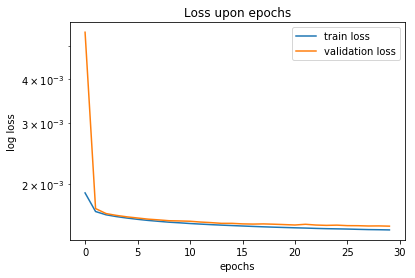

In [11]:
plt.plot(loss_train, label='train loss')
plt.plot(loss_valid, label='validation loss')
plt.title('Loss upon epochs')
plt.xlabel('epochs')
plt.ylabel('log loss')
plt.yscale('log')
plt.legend()
plt.show()

## See how latent variables distribute